# Investigating the TMDB Data (Basic Analysis)

## Questions that are Answered during the Analysis of the Dataset:
**Q1:   Movies with Highest and Lowest Budget** <br>
**Q2:   Movies that collected most and least revenue** <br>
**Q3:   Movies with longest and shortest Runtime** <br>
**Q4:   Average runtime of the Movies** <br>
**Q5:   Analysing Profit with the year of Release** <br>
**Q6:   Most Profitable Movies with respect to Genres** <br>
**Q7:   Profitable Movies with Casting** <br>
**Q8:   Average Budget, Revenue, durating of the Most Profitable Movies** <br>

### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
% matplotlib inline

In [2]:
# Reading Data (CSV File)
data = pd.read_csv('tmdb-movies.csv')

In [3]:
#Listing all the columns in Data for cursory understanding
list(data)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [4]:
# First five rows of the data
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# These are the columns that are not necessary in our analysis as they do not serve in any way to our research questions
del_col = ['id','imdb_id','popularity','homepage','keywords','overview','production_companies','vote_count','vote_average','budget_adj','revenue_adj']
data = data.drop(del_col, axis=1)  # Here we dropped the unnecessary columns from the data

In [6]:
#This is how our data looks noe after dropping the columns
data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [7]:
data.shape #This will include the row at index 0 which is the names of columns. We can delete it but 
           #just to keep it simple we are no doing it. 


(10866, 10)

In [8]:
#Now we will drop the duplicate rows
d1 = data.drop_duplicates(keep = 'first', inplace= True)
data.shape

(10865, 10)

In [9]:
# In previous cell we see that one row has been dropped as a result of drop_duplicates.
num_zeros = (data[['budget','revenue']] == 0).astype(int).sum(axis=0) #This gives us the number of zeros in budget and revenue columns
num_zeros

budget     5696
revenue    6016
dtype: int64

In [10]:
# Let's drop the zeroes by converting them to Nan first. We are dropping the zeroes as it serve no purpose in budget and
# revenue column
data[['budget','revenue']] = data[['budget','revenue']].replace(0, np.NAN)
data.dropna(subset= ['budget','revenue'], inplace = True)
data.shape
 

(3854, 10)

In [11]:
# Here we change the release date column into standard date format to standaerdize it
data['release_date'] = pd.to_datetime(data['release_date'])
data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [12]:
#Replace all zeroes in runtime with NAN.
data['runtime'] = data['runtime'].replace(0,np.NAN)

In [13]:
data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [14]:
# Change the data type of budget and revenue columns to int64 for easy calculation later
data[['budget','revenue']] = data[['budget','revenue']].applymap(np.int64)
data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [15]:
# Calculating the profit of the movie.
profit = data['revenue']- data['budget']
data.insert(2, 'profit earned', profit) # inserting the  at index 2 as 'profit earned' column


In [16]:
data.head() # Here we see that profit earned column is at index 2

,budget,revenue,profit earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [17]:
# Here we find the movie with highest profit and least profit.

# Let's def a function to calculate the profit earned or loss made. We can use this function for further calculations

def calculate(column):
    
    high = data[column].idxmax()
    high_details = pd.DataFrame(data.loc[high])
    
    low = data[column].idxmin()
    low_details = pd.DataFrame(data.loc[low])
    
    #info = high_details.join(low_details). This could be an option to join both dataframes where we do not need to specify axis = 1.
    info = pd.concat([high_details, low_details],axis=1)
    return info



In [18]:
calculate('profit earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


In [19]:
# Highest and lowest budget
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


In [20]:
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


In [21]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


In [22]:
# Average runtime of the movie.

avg_runtime = data['runtime'].mean()
avg_runtime

109.22029060716139

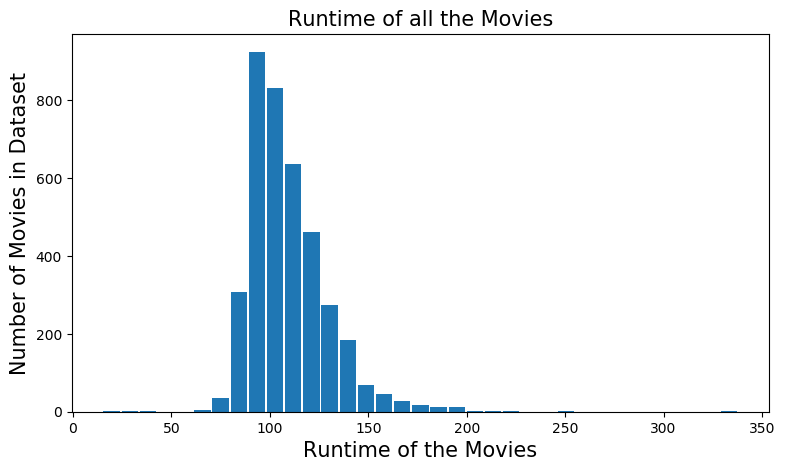

In [23]:
# Let's analyze the average runtime in graphical form
plt.figure(figsize=(9,5), dpi=100)

plt.xlabel('Runtime of the Movies',fontsize = 15)

plt.ylabel('Number of Movies in Dataset', fontsize = 15)

plt.title('Runtime of all the Movies', fontsize = 15)

plt.hist(data['runtime'],rwidth = 0.9, bins = 35)

plt.show()

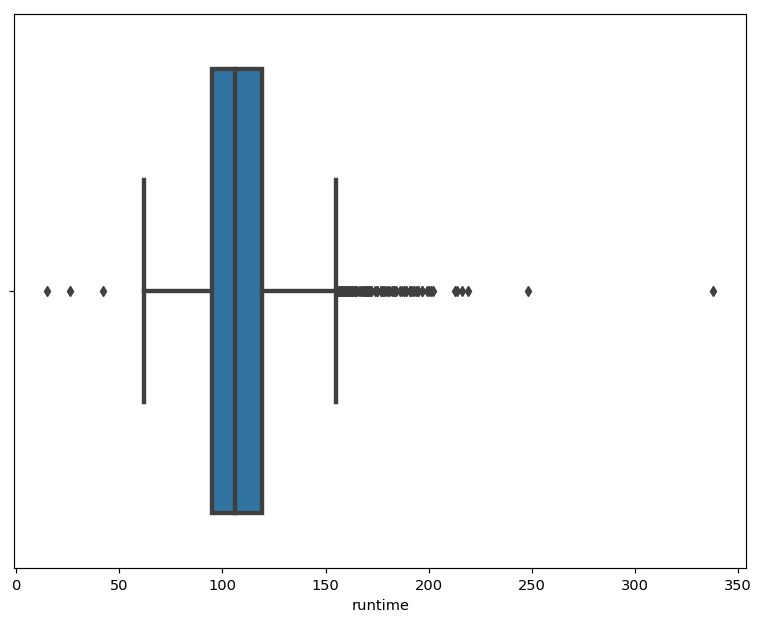

In [24]:
# Here we are analysing more about the runtime of the movies through boxplot.
import seaborn as sns
plt.figure(figsize= (9,7), dpi = 105)

sns.boxplot(data['runtime'], linewidth = 3)
plt.show()

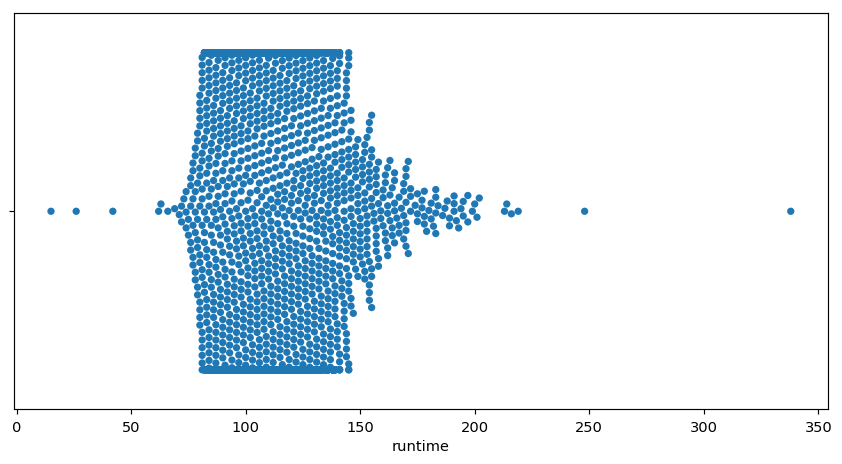

In [25]:
# here let's plot the swarmplot using seaborn library

plt.figure( figsize= (10,5), dpi = 105)

sns.swarmplot(data['runtime'])
plt.show()

In [26]:
data['runtime'].describe() #getting the statistics of the runtime 

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [27]:
#Here we are grouping the sum of profits made by movies with respect to year they were released in
profit_year = data.groupby('release_year')['profit earned'].sum()
profit_year.head()

release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
Name: profit earned, dtype: int64

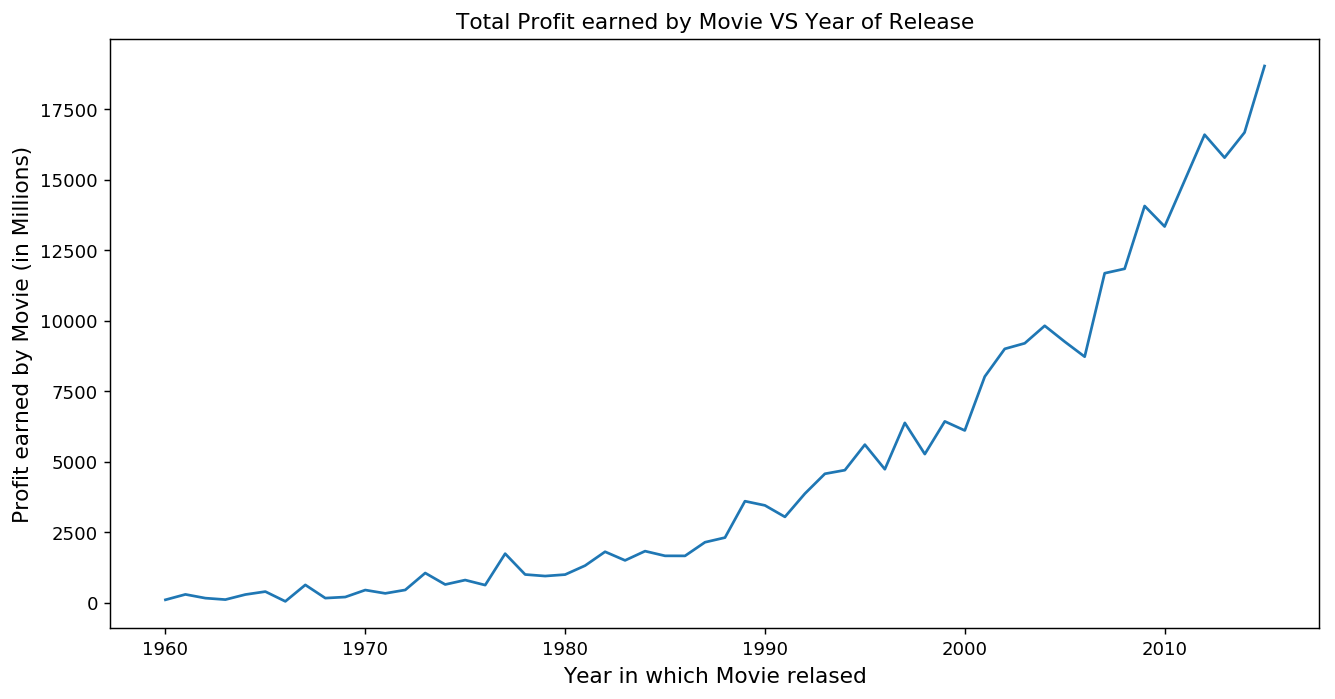

In [28]:
#Plotting the line plot to visualize the relation 
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel("Year in which Movie relased", fontsize = 12)
plt.ylabel("Profit earned by Movie (in Millions)", fontsize = 12)
plt.title("Total Profit earned by Movie VS Year of Release")
plt.plot(profit_year/1000000)
plt.show()

In [29]:
#What was the year in which profit made by movies was the highest
print (profit_year.idxmax())
print (profit_year.max())

2015
19032145273


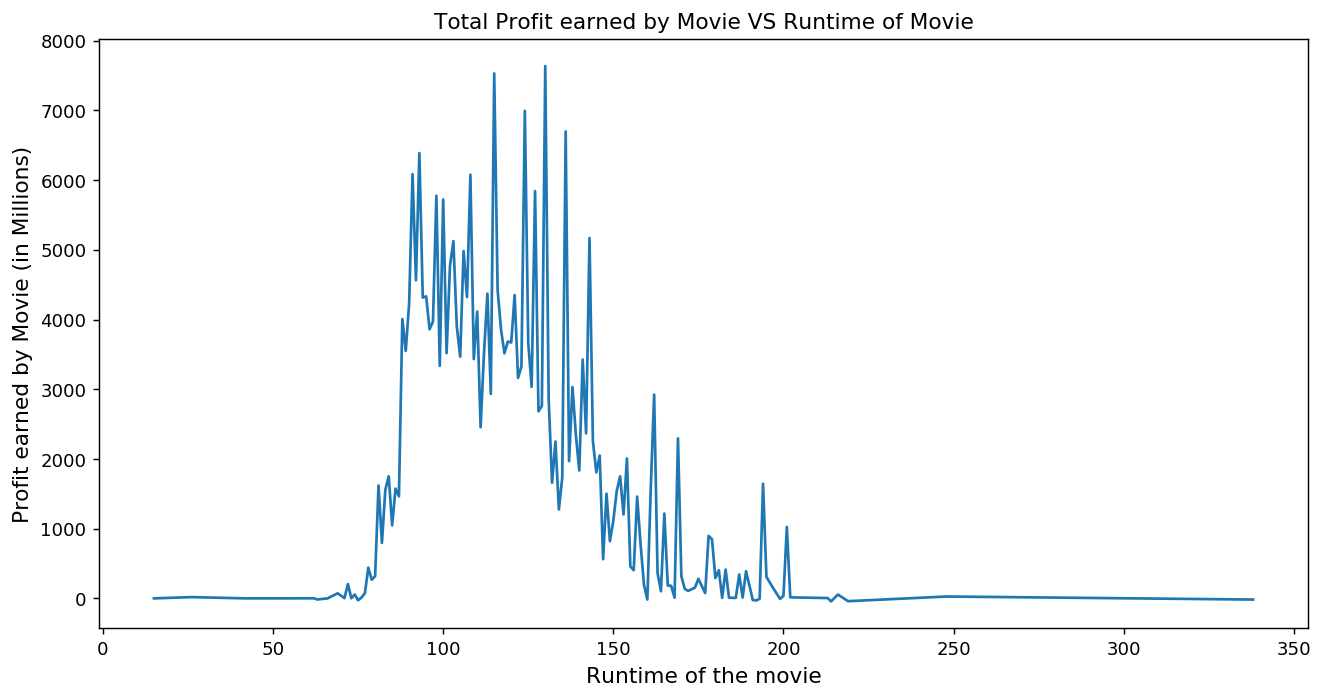

In [30]:
# Here we are plotting the profitable movies with respect to runtime
runtime_year = data.groupby('runtime')['profit earned'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel("Runtime of the movie", fontsize = 12)
plt.ylabel("Profit earned by Movie (in Millions)", fontsize = 12)
plt.title("Total Profit earned by Movie VS Runtime of Movie")
plt.plot(runtime_year/1000000)
plt.show()

In [31]:
print(runtime_year.max())
print(runtime_year.idxmax()) # this shows the runtime at which movies that made highest profits.

7636942726
130


In [32]:
# Now lets examine the movies with profit value of $30 Millions and above.
profit = data[data['profit earned'] >= 30000000]
len(profit)  # This gives us the total number of movies that have made profit of over $30 Million

1672

In [33]:
#Let's define a function that can take in the column and split mulitple values in it 
def frequency(column):
    x = profit[column].str.cat(sep = '|')
    
    x = pd.Series(x.split('|'))
    
    count = x.value_counts(ascending = False)
    
    return count

In [34]:
y = frequency('genres')
y

Drama              634
Comedy             606
Action             546
Thriller           508
Adventure          431
Romance            277
Crime              262
Family             260
Science Fiction    242
Fantasy            223
Horror             169
Mystery            139
Animation          134
Music               58
History             54
War                 53
Western             19
Documentary          8
TV Movie             1
Foreign              1
dtype: int64

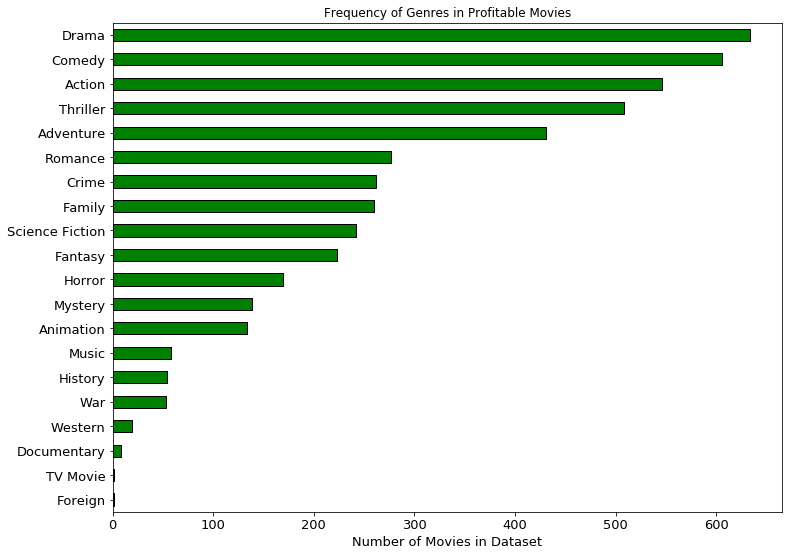

In [35]:
# Let's plot the graph of above observations
y.sort_values(ascending = True, inplace = True)

fig = y.plot.barh(color = 'green', edgecolor = 'black', fontsize = 13)

fig.set(title="Frequency of Genres in Profitable Movies")
fig.set_xlabel("Number of Movies in Dataset", color = 'black', fontsize = 13)
fig.figure.set_size_inches(12,9)
plt.show()


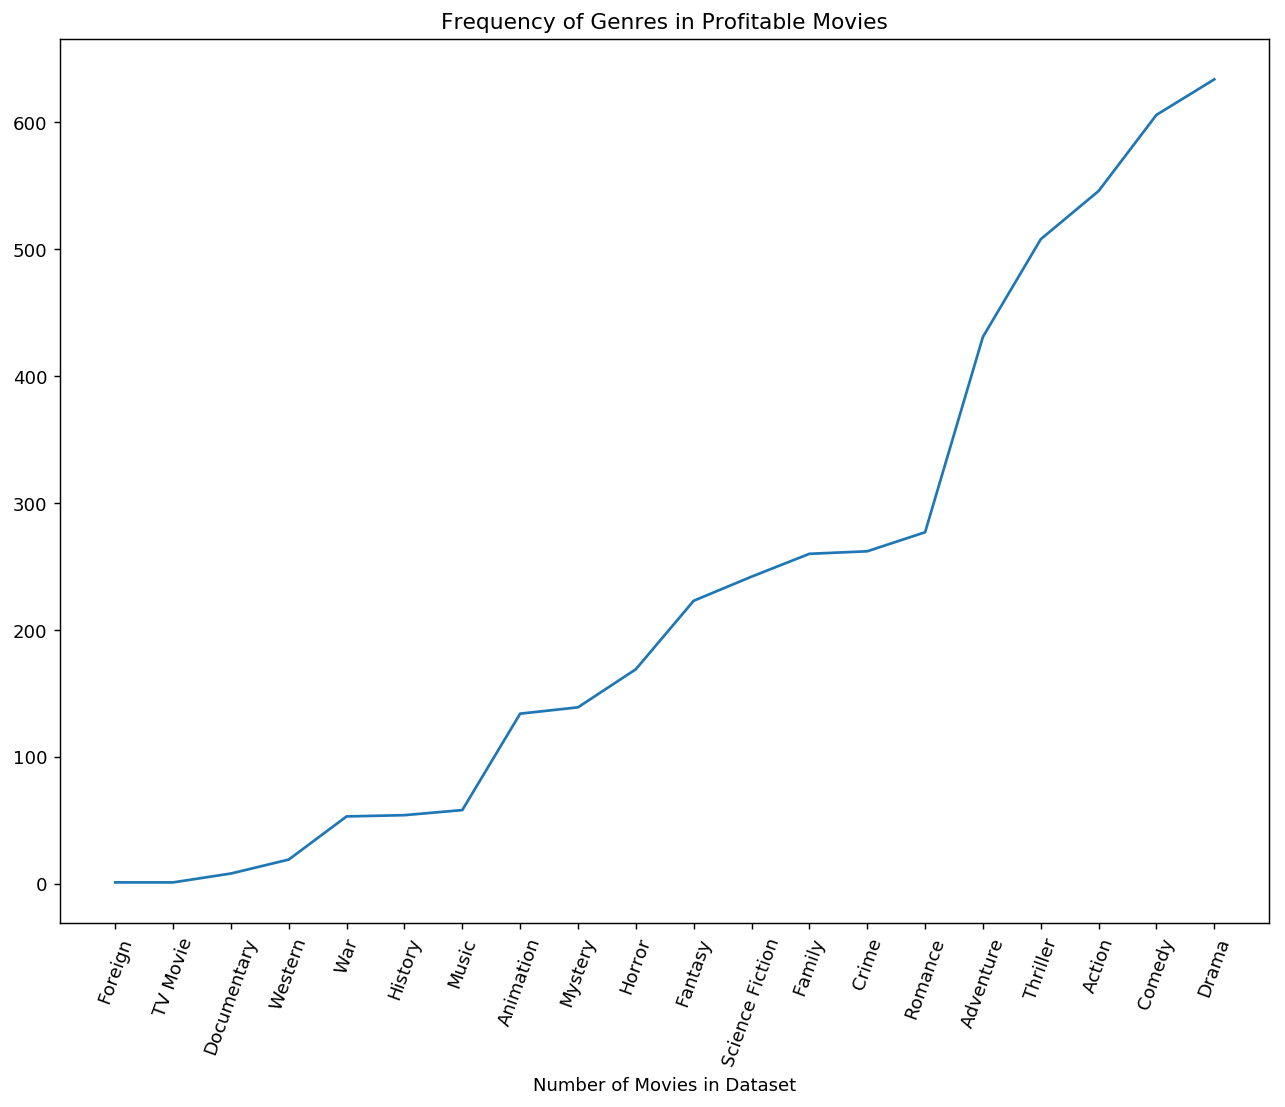

In [36]:
#Here figure shows the line plot of genres in profitable movies.
plt.figure(figsize=(12,9), dpi = 130,)
plt.title("Frequency of Genres in Profitable Movies")
plt.xlabel("Number of Movies in Dataset")
plt.xticks(rotation =70)
plt.plot(y)


In [37]:
# Let's have look at cast in profitable movies
c = frequency('cast')
c

Tom Cruise                28
Tom Hanks                 27
Brad Pitt                 26
Robert De Niro            24
Cameron Diaz              23
Eddie Murphy              23
Bruce Willis              22
Johnny Depp               22
Sylvester Stallone        21
Jim Carrey                20
Robin Williams            20
Harrison Ford             20
Denzel Washington         20
Matt Damon                20
Mark Wahlberg             20
Samuel L. Jackson         20
George Clooney            19
Nicolas Cage              19
Adam Sandler              19
Owen Wilson               19
Arnold Schwarzenegger     19
Ben Stiller               19
Julia Roberts             18
Will Smith                17
Gary Oldman               17
Morgan Freeman            17
Meryl Streep              16
Liam Neeson               16
John Travolta             16
Sandra Bullock            16
                          ..
Jean Dujardin              1
Elliott Gould              1
Julian Sands               1
J. Pat O'Malle

In [38]:
# Now lets calculate average of the profitable movie
def avg(column):
    return profit[column].mean()

In [39]:
avg_budget = avg('budget')
int(avg_budget)

53932204

In [40]:
avg_revenue = avg('revenue')
int(avg_revenue)

217458935

In [41]:
avg_runtime = avg('runtime')
int(avg_runtime)

112